In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from pipeline.label_pipeline import FairnessLabelPipeline
from fairness_label.fairness_label import *
from visualization.visualize_plots import *
%matplotlib inline

## Specify basic parameters for upload dataset - Adult Income as example

In [3]:
data_file = "data/adult_AIF.csv"
y_col = "income-per-year"
y_posi = [">50K"]
na_symbol = "?"
sensi_atts = ["sex", "race"]
sensi_pro_valus = {"sex": ["Female"], "race": ["Black", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other"]}

## Specify a base pipeline to drop missing values and include no fairness interventions

In [4]:
base_steps = [("BalanceTargetSplitter", [0.7, 0.3], y_col), # splitter
               None,  # sampler
               ("DropNAImputer", "?"), # imputer
               None, # scaler
               None, # categorizer
               None,  # encoder
               None, # sensitive att and target encoder
               None,  # fair-preprocessor
               ("OPT_LogisticRegression", y_col), # model
               None  # fair-post-postprocessor
               ]

cur_pip = FairnessLabelPipeline(data_file, y_col, y_posi, sensitive_atts=sensi_atts, protected_values=sensi_pro_valus, na_mark=na_symbol)
before_test, after_test = cur_pip.run_pipeline(base_steps, return_test=True, output_interdata=True)

BalanceTargetSplitter(input_df, [0.7, 0.3], 'income-per-year')
!!!!!!! train (22792, 9) !!!!!!!
Current train data after BalanceTargetSplitter 
 Stored in  /Users/keyang/pycharmprojects/FairnessLabelsForMLPipeline/data/inter_data/ad_BalanceTargetSplitter_DropNAImputer_OPT_LogisticRegression/train/adult_AIF__after__BalanceTargetSplitter.csv

!!!!!!! test (9769, 9) !!!!!!!
Current test data after BalanceTargetSplitter 
 Stored in  /Users/keyang/pycharmprojects/FairnessLabelsForMLPipeline/data/inter_data/ad_BalanceTargetSplitter_DropNAImputer_OPT_LogisticRegression/test/adult_AIF__after__BalanceTargetSplitter.csv

Done Splitter

DropNAImputer(input_df, '?')
!!!!!!! train (21498, 9) !!!!!!!
Current train data after BalanceTargetSplitte DropNAImpute 
 Stored in  /Users/keyang/pycharmprojects/FairnessLabelsForMLPipeline/data/inter_data/ad_BalanceTargetSplitter_DropNAImputer_OPT_LogisticRegression/train/adult_AIF__after__BalanceTargetSplitte__DropNAImpute.csv

!!!!!!! test (9227, 9) !!!!!!!
C

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.0s finished


!!!!!!! train (21498, 10) !!!!!!!
Current train data after BalanceTargetSplitte DropNAImpute OPT_LogisticRegression 
 Stored in  /Users/keyang/pycharmprojects/FairnessLabelsForMLPipeline/data/inter_data/ad_BalanceTargetSplitter_DropNAImputer_OPT_LogisticRegression/train/adult_AIF__after__BalanceTargetSplitte__DropNAImpute__OPT_LogisticRegression.csv

!!!!!!! test (9227, 10) !!!!!!!
Current test data after BalanceTargetSplitte DropNAImpute OPT_LogisticRegression 
 Stored in  /Users/keyang/pycharmprojects/FairnessLabelsForMLPipeline/data/inter_data/ad_BalanceTargetSplitter_DropNAImputer_OPT_LogisticRegression/test/adult_AIF__after__BalanceTargetSplitte__DropNAImpute__OPT_LogisticRegression.csv

Done model



## Generate fairness label and visualize it

### Static label for race

In [5]:
sl_race = get_static_label(after_test, [sensi_atts[0]], y_col)
sl_race

{'Female': {'<=50K': 0.383, '>50K': 0.145},
 'Male': {'<=50K': 0.617, '>50K': 0.855}}

### Static label for race and gender

In [6]:
sl_race_sex = get_static_label(after_test, sensi_atts, y_col)
sl_race_sex

{('Female', 'Black&more'): {'<=50K': 0.201, '>50K': 0.108},
 ('Female', 'White'): {'<=50K': 0.799, '>50K': 0.892},
 ('Male', 'Black&more'): {'<=50K': 0.132, '>50K': 0.079},
 ('Male', 'White'): {'<=50K': 0.868, '>50K': 0.921}}

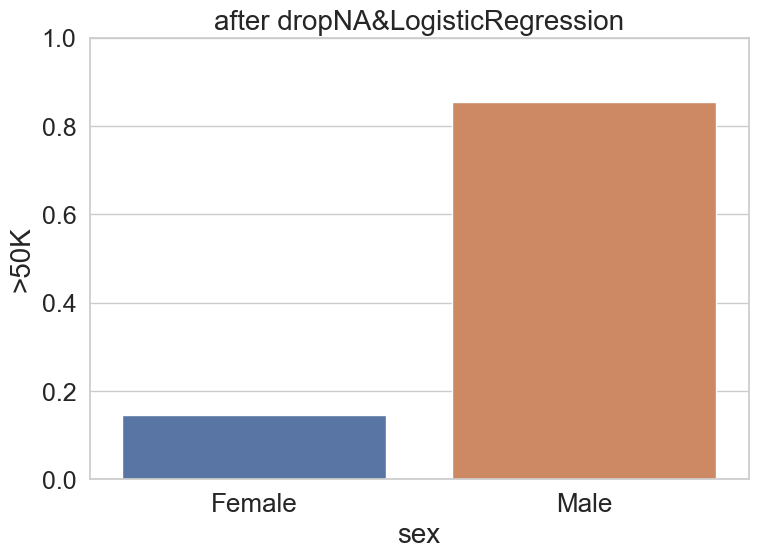

In [7]:
draw_bar_plot(sl_race, y_posi[0], [sensi_atts[0]], "dropNA&LogisticRegression")

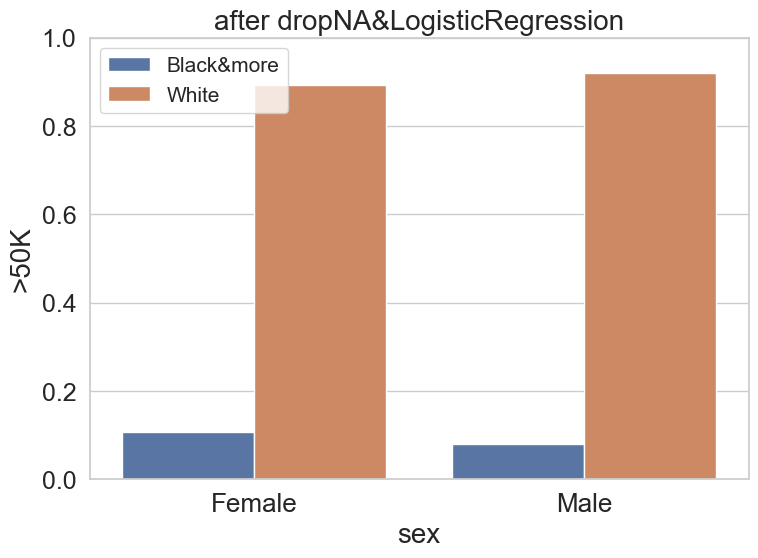

In [8]:
draw_bar_plot(sl_race_sex, y_posi[0], sensi_atts, "dropNA&LogisticRegression")

### Performance label for race

In [9]:
pl_race = get_performance_label(after_test, [sensi_atts[0]], y_col, y_posi[0])
pl_race

{'Female': {'PR': 0.889,
  'TPR': 0.927,
  'TNR': 0.366,
  'FPR': 0.634,
  'FNR': 0.073},
 'Male': {'PR': 0.686, 'TPR': 0.856, 'TNR': 0.534, 'FPR': 0.466, 'FNR': 0.144}}

### Performance label for race and gender

In [10]:
pl_race_sex = get_performance_label(after_test, sensi_atts, y_col, y_posi[0])
pl_race_sex

{('Female', 'Black&more'): {'PR': 0.937,
  'TPR': 0.938,
  'TNR': 0.361,
  'FPR': 0.639,
  'FNR': 0.062},
 ('Female', 'White'): {'PR': 0.877,
  'TPR': 0.924,
  'TNR': 0.367,
  'FPR': 0.633,
  'FNR': 0.076},
 ('Male', 'Black&more'): {'PR': 0.786,
  'TPR': 0.888,
  'TNR': 0.506,
  'FPR': 0.494,
  'FNR': 0.112},
 ('Male', 'White'): {'PR': 0.673,
  'TPR': 0.852,
  'TNR': 0.536,
  'FPR': 0.464,
  'FNR': 0.148}}

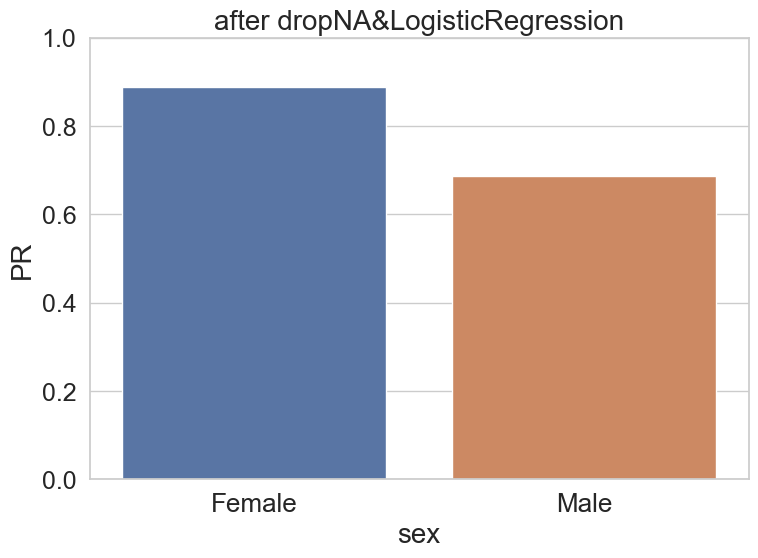

In [11]:
draw_bar_plot(pl_race, "PR", [sensi_atts[0]], "dropNA&LogisticRegression")

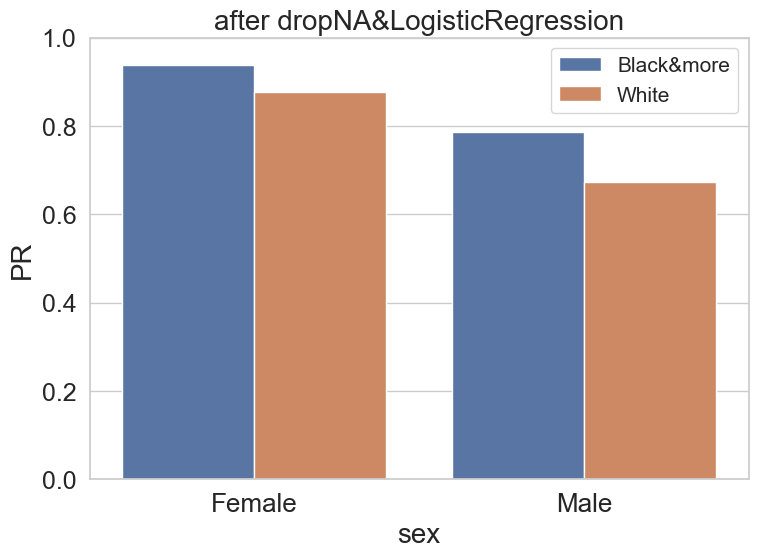

In [12]:
draw_bar_plot(pl_race_sex, "PR", sensi_atts, "dropNA&LogisticRegression", True)

## Specify a pipeline with imputation and fairness preprocess interventions

In [13]:
debias_focus_att = "sex"
fair_steps = [("BalanceTargetSplitter", [0.7, 0.3], y_col),
               None,  # sampler
               ("ModeImputer", [], ["workclass"], "?"), # imputer
               None, # scaler
               None, # categorizer
               None,  # encoder
               None,
               ("AIF_DIRemover", y_col, debias_focus_att, 1.0),  # fair-preprocessor
               ("OPT_LogisticRegression", y_col), # model
               None  # fair-post-postprocessor
               ]

cur_pip = FairnessLabelPipeline(data_file, y_col, y_posi, sensitive_atts=sensi_atts, protected_values=sensi_pro_valus, na_mark="?")
_, after_test_fair = cur_pip.run_pipeline(fair_steps, return_test=True, output_interdata=True)


BalanceTargetSplitter(input_df, [0.7, 0.3], 'income-per-year')
!!!!!!! train (22792, 9) !!!!!!!
Current train data after BalanceTargetSplitter 
 Stored in  /Users/keyang/pycharmprojects/FairnessLabelsForMLPipeline/data/inter_data/ad_BalanceTargetSplitter_ModeImputer_AIF_DIRemover_OPT_LogisticRegression/train/adult_AIF__after__BalanceTargetSplitter.csv

!!!!!!! test (9769, 9) !!!!!!!
Current test data after BalanceTargetSplitter 
 Stored in  /Users/keyang/pycharmprojects/FairnessLabelsForMLPipeline/data/inter_data/ad_BalanceTargetSplitter_ModeImputer_AIF_DIRemover_OPT_LogisticRegression/test/adult_AIF__after__BalanceTargetSplitter.csv

Done Splitter

ModeImputer(input_df, [], ['workclass'], '?')
!!!!!!! train (22792, 9) !!!!!!!
Current train data after BalanceTargetSplitte ModeImputer 
 Stored in  /Users/keyang/pycharmprojects/FairnessLabelsForMLPipeline/data/inter_data/ad_BalanceTargetSplitter_ModeImputer_AIF_DIRemover_OPT_LogisticRegression/train/adult_AIF__after__BalanceTargetSplitte

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.2s finished


!!!!!!! train (22792, 10) !!!!!!!
Current train data after BalanceTargetSplitte ModeImpute AIF_DIRemove OPT_LogisticRegression 
 Stored in  /Users/keyang/pycharmprojects/FairnessLabelsForMLPipeline/data/inter_data/ad_BalanceTargetSplitter_ModeImputer_AIF_DIRemover_OPT_LogisticRegression/train/adult_AIF__after__BalanceTargetSplitte__ModeImpute__AIF_DIRemove__OPT_LogisticRegression.csv

!!!!!!! test (9769, 10) !!!!!!!
Current test data after BalanceTargetSplitte ModeImpute AIF_DIRemove OPT_LogisticRegression 
 Stored in  /Users/keyang/pycharmprojects/FairnessLabelsForMLPipeline/data/inter_data/ad_BalanceTargetSplitter_ModeImputer_AIF_DIRemover_OPT_LogisticRegression/test/adult_AIF__after__BalanceTargetSplitte__ModeImpute__AIF_DIRemove__OPT_LogisticRegression.csv

Done model



### Static label for race

In [14]:
sl_race_fair = get_static_label(after_test_fair, [sensi_atts[0]], y_col)
sl_race_fair

{'Female': {'<=50K': 0.39, '>50K': 0.148},
 'Male': {'<=50K': 0.61, '>50K': 0.852}}

### Static label for race and gender

In [15]:
sl_race_sex_fair = get_static_label(after_test_fair, sensi_atts, y_col)
sl_race_sex_fair

{('Female', 'Black&more'): {'<=50K': 0.201, '>50K': 0.106},
 ('Female', 'White'): {'<=50K': 0.799, '>50K': 0.894},
 ('Male', 'Black&more'): {'<=50K': 0.134, '>50K': 0.078},
 ('Male', 'White'): {'<=50K': 0.866, '>50K': 0.922}}

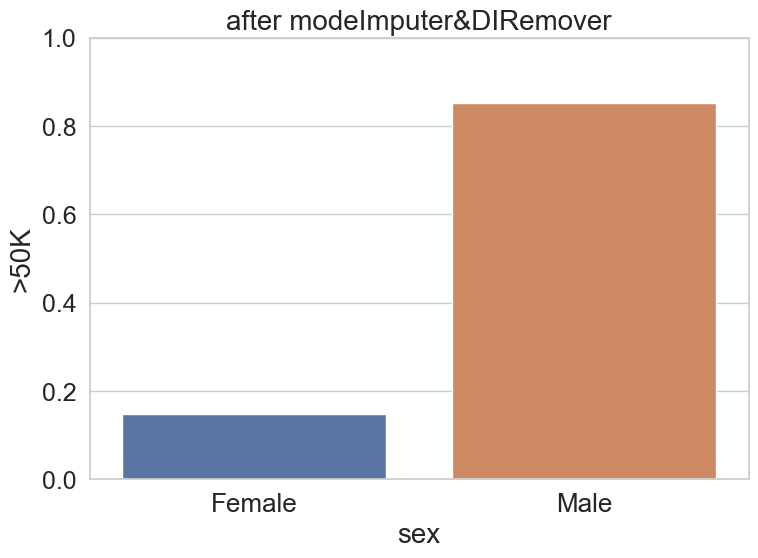

In [16]:
draw_bar_plot(sl_race_fair, y_posi[0], [sensi_atts[0]], "modeImputer&DIRemover")

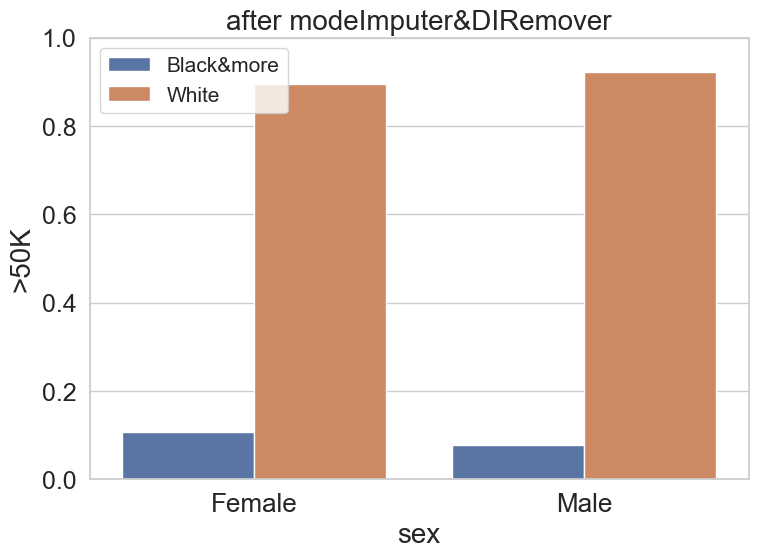

In [17]:
draw_bar_plot(sl_race_sex_fair, y_posi[0], sensi_atts, "modeImputer&DIRemover")

### Performance label for race

In [18]:
pl_race_fair = get_performance_label(after_test_fair, [sensi_atts[0]], y_col, y_posi[0])
pl_race_fair

{'Female': {'PR': 0.892,
  'TPR': 0.915,
  'TNR': 0.427,
  'FPR': 0.573,
  'FNR': 0.085},
 'Male': {'PR': 0.693, 'TPR': 0.802, 'TNR': 0.644, 'FPR': 0.356, 'FNR': 0.198}}

### Performance label for race and gender

In [19]:
pl_race_sex_fair = get_performance_label(after_test_fair, sensi_atts, y_col, y_posi[0])
pl_race_sex_fair

{('Female', 'Black&more'): {'PR': 0.94,
  'TPR': 0.933,
  'TNR': 0.405,
  'FPR': 0.595,
  'FNR': 0.067},
 ('Female', 'White'): {'PR': 0.881,
  'TPR': 0.91,
  'TNR': 0.429,
  'FPR': 0.571,
  'FNR': 0.09},
 ('Male', 'Black&more'): {'PR': 0.796,
  'TPR': 0.84,
  'TNR': 0.66,
  'FPR': 0.34,
  'FNR': 0.16},
 ('Male', 'White'): {'PR': 0.68,
  'TPR': 0.796,
  'TNR': 0.643,
  'FPR': 0.357,
  'FNR': 0.204}}

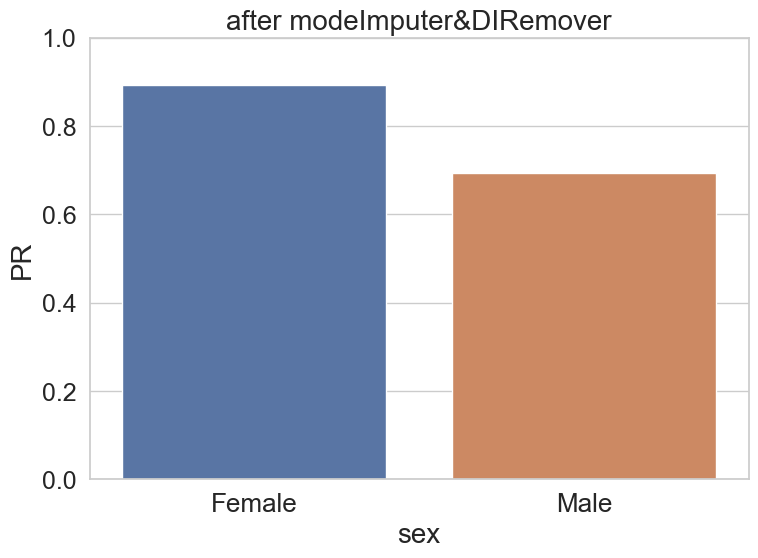

In [22]:
draw_bar_plot(pl_race_fair, "PR", [sensi_atts[0]], "modeImputer&DIRemover")

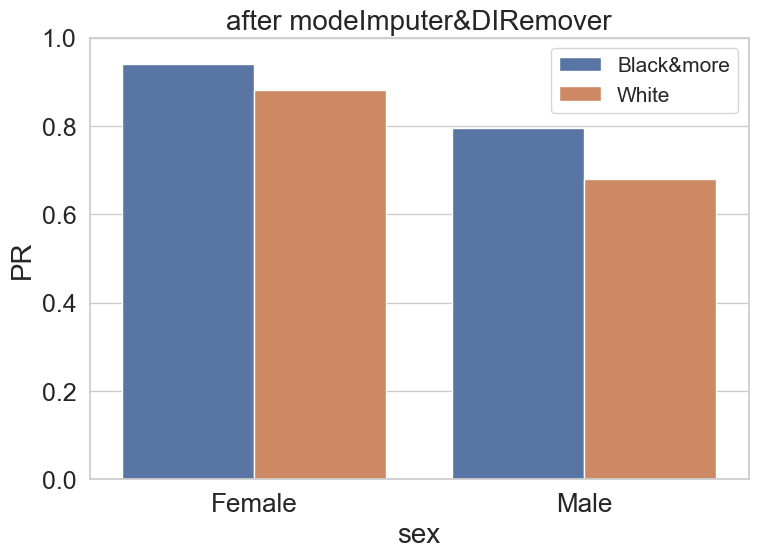

In [25]:
draw_bar_plot(pl_race_sex_fair, "PR", sensi_atts, "modeImputer&DIRemover", True)